# Tarea 2. Analítica de datos.

**Profesor:** Julio Erasmo Godoy Del Campo (jugodoy@inf.udec.cl).<br>
**Ayudante:** Daniel Moreno Cartagena (dmoreno2016@inf.udec.cl).

**Integrante:**

Fecha de entrega: **27 de Mayo 2022 antes de las 23:59**

**¿Cómo debe subir la tarea?:** La tarea debe ser subida a la plataforma de Canvas en un archivo con el formato **NombreApellido_tarea2.zip**. Este debe contener el código solicitado junto con los datos utilizados.

## Objetivo

El objetivo de esta tarea es ver como funcionan los métodos de agrupación y reducción de la dimensionalidad sobre un conjunto de datos de reconocimiento de actividad humana que viene adjunto en el zip. Principalmente se quiere que el alumno aprenda a utilizar técnicas de clustering sobre un conjunto de datos, técnicas de reducción de dimensionalidad y que pueda observar experimentalmente como varian los resultados al agrupar datos considerando todas las dimensiones, como también, considerando solo las más importantes.

El dataset fue extraido desde el repositorio de datos de Machine Learning, [aquí](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) pueden encontrar más información del conjunto de datos a utilizar. En simples palabras, este dataset corresponde a la actividad que esta realizando cierta persona en un momento dado, la cual puede ser explicada mediante ciertos atributos de interes que fueron medidos usando un celular en la cintura. Por ejemplo, se sabe si una persona camino, se puso de pie, se acostó, se sentó, subio o bajo las escaleras.

Supondremos que no conocemos el tipo de actividad que esta realizando la persona, e intentaremos agrupar a las personas, según su tipo de actividad, únicamente en función de los atributos disponibles.

## Lectura del conjunto de datos

Se adjuntará el código de lectura para el conjunto de datos. Si se fijan el dataset tambien viene con más atributos que se podrían considerar, sin embargo, solo se usaran los que estan directamente en los archivos train y test.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_file = 'UCI HAR Dataset'

train_path_x = 'train/X_train.txt'
train_path_y = 'train/y_train.txt'

test_path_x = 'test/X_test.txt'
test_path_y = 'test/y_test.txt'

X_train = np.loadtxt('{}/{}'.format(path_file, train_path_x))
y_train = np.loadtxt('{}/{}'.format(path_file, train_path_y)).astype(int)

X_test = np.loadtxt('{}/{}'.format(path_file, test_path_x))
y_test = np.loadtxt('{}/{}'.format(path_file, test_path_y)).astype(int)

In [3]:
print("Tamaño de los datos:\n")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Tamaño de los datos:

X_train: (7352, 561)
y_train: (7352,)
X_test: (2947, 561)
y_test: (2947,)


Como puede darse cuenta los datos estan separados en conjunto de train y test, sin embargo, para realizar apredizaje no supervisado, no es necesario un conjunto de test con el cual comparar la agrupación, ya que esta agrupación se puede hacer con la etiqueta respectiva de cada uno de los datos (columna actividad). Por lo tanto, trabajaremos con la combinación de muestras de train y test. Combine X_train con X_test e y_train con y_test. **<span style="color:red">(0.5 pt)</span>**

In [4]:
X = np.concatenate( (X_train, X_test), axis = 0 )
y = np.concatenate( (y_train, y_test), axis = 0 )

Defina el número de valores únicos de las etiquetas de cada clase, como también la cantidad de observaciones por clase (columna actividad). **<span style="color:red">(0.5 pt)</span>**

In [5]:
y_train = pd.DataFrame(y_train)
y_train.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64

In [6]:
y_test = pd.DataFrame(y_test)
y_test.value_counts()

6    537
5    532
1    496
4    491
2    471
3    420
dtype: int64

In [7]:
y_test.value_counts() + y_train.value_counts()

1    1722
2    1544
3    1406
4    1777
5    1906
6    1944
dtype: int64

Generalmente los métodos de clustering y de reducción de dimensionalidad funcionan mejor con datos escalados, por ende, escale la muestra. **<span style="color:red">(0.5 pt)</span>**

In [8]:
from sklearn.preprocessing import StandardScaler


In [9]:
scale = StandardScaler()
X_esc =  scale.fit_transform(X)

In [10]:
df = pd.DataFrame(X_esc)

## Pregunta 1. Aplicación de algoritmos de clustering.

La idea es que aplique 3 algoritmos de clustering directamente al conjunto de datos utilizado y responda las preguntas presentadas en esta sección.

Los algoritmos deben ser los siguientes:
- K-means
- DBSCAN
- Agglomerative Clustering

**1. Utilice silhouette, el dendrograma (si es posible) y el NearestNeighbors (n_neighbors=4) para visualizar el número de cluster "óptimos" en los métodos. <span style="color:red">(2 pts)</span>**

Coeficiente de Silhouette

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets

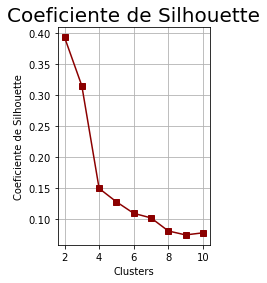

' En este caso se aprecia que el óptimo son 2 cluster'

In [12]:
scores = []
scores_s = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 24)
    km.fit(df)
    scores.append(km.inertia_)
    scores_s.append(silhouette_score(df, km.labels_))
    
    # Coeficiente de Silhouette Method
plt.subplot(1,2,2)
plt.plot(range(2, 11), scores_s, '-s', color='darkred')
plt.title('Coeficiente de Silhouette',  fontsize= 20)
plt.xlabel('Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.grid()

plt.show()

" En este caso se aprecia que el óptimo son 2 cluster"

In [ ]:
#kmeans = KMeans(n_clusters=6, random_state=0)
#labels_kmeans = kmeans.fit_predict(df)

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
dbscan = DBSCAN(eps=12, min_samples = 100)
dbscan = dbscan.fit(df)
y_dbscan = dbscan.labels_

NearestNeighbors

In [15]:
from sklearn.neighbors import NearestNeighbors


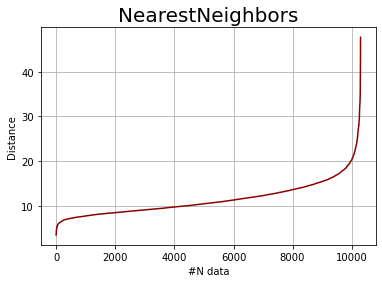

In [17]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_esc)
distances, indices = neighbors_fit.kneighbors(X_esc)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances, color='darkred')
plt.title('NearestNeighbors',  fontsize= 20)
plt.xlabel('#N data')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
clusters_list = range(2, 15) # rango de clusters

silhouette_scores = []
for c in clusters_list:
    ahc = AgglomerativeClustering(n_clusters= c, affinity='euclidean', linkage='average')
    clusters = ahc.fit_predict(X_esc)
    
    sil_metric = silhouette_score(X_esc, clusters)
    silhouette_scores.append(sil_metric)

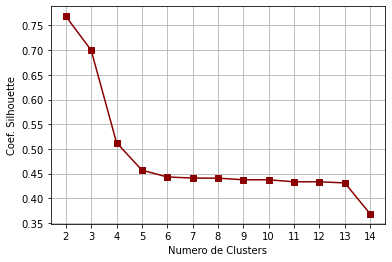

In [21]:
plt.plot(range(2, 15), silhouette_scores, '-s', color='darkred')
plt.xlabel('Numero de Clusters')
plt.ylabel('Coef. Silhouette')
plt.xticks(range(2, 15))
plt.grid()
plt.show()

In [22]:
best = np.argmax(silhouette_scores)
mejor_numero_de_clusters = clusters_list[best]
mejor_numero_de_clusters
print ( "El mejor_numero_de_clusters es = ", mejor_numero_de_clusters, )

El mejor_numero_de_clusters es =  2


Dendograma

In [23]:
import scipy.cluster.hierarchy as shc

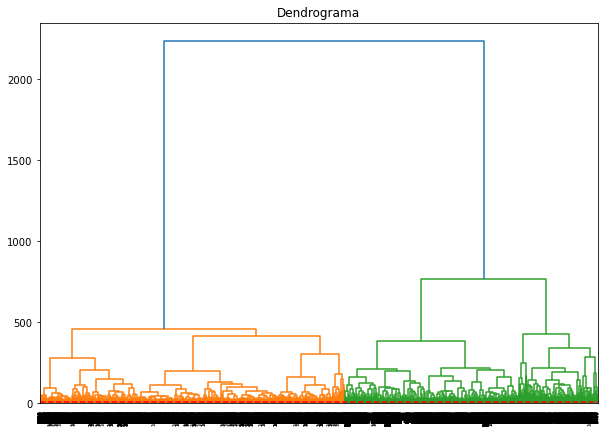

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  

plt.title("Dendrograma")  

dend = shc.dendrogram(shc.linkage(df, method='ward'))

plt.axhline(y=6, color='r', linestyle='--')

plt.show()

In [27]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_esc)  

array([3, 5, 5, ..., 1, 0, 0])

Text(0, 0.5, ' ')

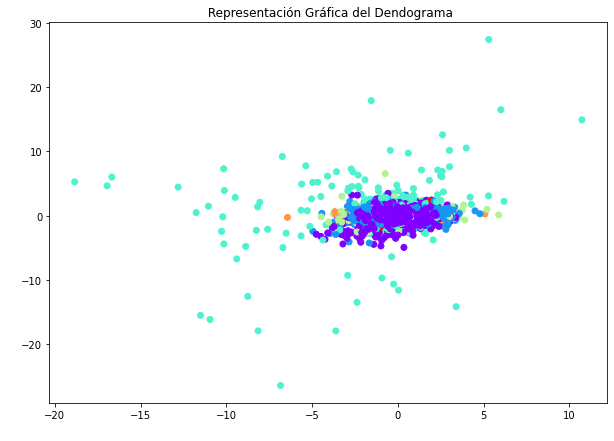

In [28]:
#Ploteamos el Dendograma
plt.figure(figsize=(10, 7))
plt.title(" Representación Gráfica del Dendograma")
plt.scatter(X_esc[:,0], X_esc[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel(" ")
plt.ylabel(" ")

<span style="color:red">A pesar de la cantidad de cluster "óptimos" que se hayan obtenido de la pregunta 1, para las siguientes preguntas utilice n_cluster = 6, ya que permitirá hacer la comparación directa con las etiquetas reales. Como el DBSCAN no permite ingresar el numero de clusters de manera manual, puede no considerarlo para las siguientes preguntas o bien considerarlo si cree que es necesario.</span>

**2. Realice el grafico de barra de los clusters formados por K-means y Agglomerative, es decir, utilice las etiquetas en el eje "x" y la cantidad por etiqueta en el eje "y". <span style="color:red">(1 pt)</span>**

In [29]:
ahc = AgglomerativeClustering(n_clusters=6)
ahc.fit(df)
y_ahc = ahc.labels_

In [33]:
kmeans = KMeans(n_clusters=6, random_state=0)
labels_kmeans = kmeans.fit_predict(df)

In [34]:
y1= np.array(['y'])
y2 = np.array(['labels_kmeans'])
y3 = np.array(['y_ahc'])
y4  = np.array(['y_dbscan'])

In [35]:
y5 = np.column_stack((y,labels_kmeans,y_ahc,y_dbscan))

In [36]:
y6= pd.DataFrame(data=y5,columns=['y1','y2','y3','y4'])

In [37]:
km_values = np.unique(y6.y2)
ahc_values = np.unique(y6.y3)
dbscan_values = np.unique(y6.y4)

In [38]:
rangos = [1,2,3,4,5,6]  

Gráfico de Barra Clúster Kmeans 0


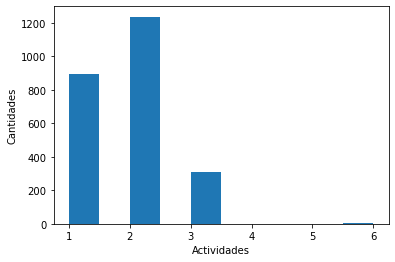

Gráfico de Barra Clúster Kmeans 1


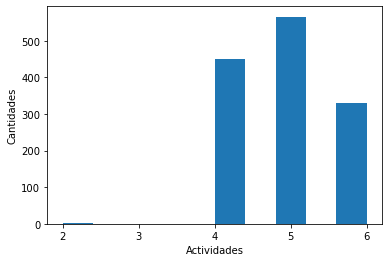

Gráfico de Barra Clúster Kmeans 2


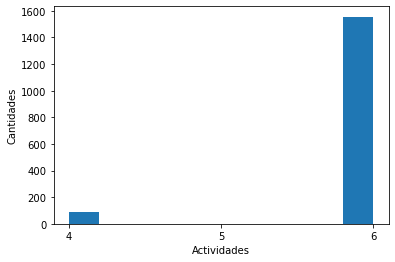

Gráfico de Barra Clúster Kmeans 3


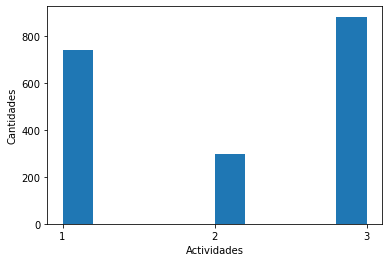

Gráfico de Barra Clúster Kmeans 4


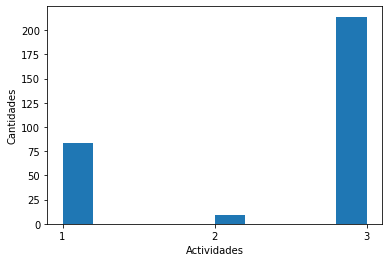

Gráfico de Barra Clúster Kmeans 5


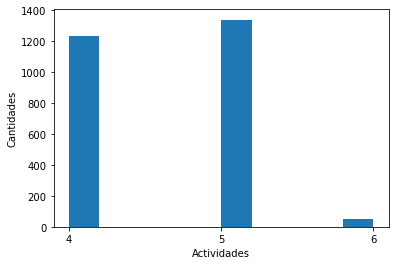

In [39]:
for x in km_values:
    data = y6[y6.y2 == x]
    print("Gráfico de Barra Clúster Kmeans "+str(x))   
    #plt.style.use('ggplot') afecta los colores de los graficos de pCA
    plt.xlabel('Actividades')
    plt.ylabel('Cantidades')
    plt.xticks(rangos)
    plt.hist(data.y1 )
    plt.show()

Gráfico de Barra Clúster Agglomerative 0


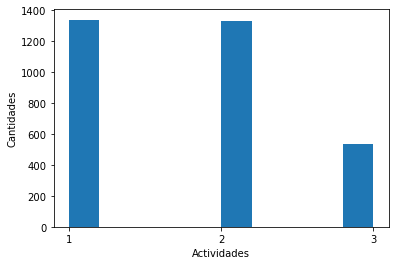

Gráfico de Barra Clúster Agglomerative 1


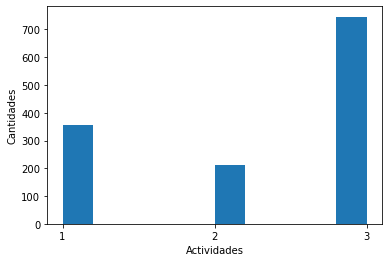

Gráfico de Barra Clúster Agglomerative 2


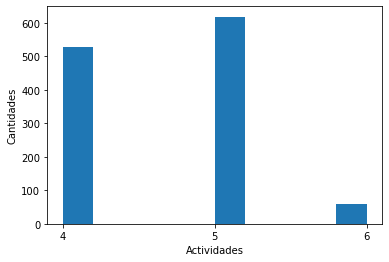

Gráfico de Barra Clúster Agglomerative 3


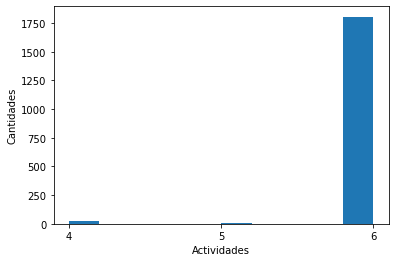

Gráfico de Barra Clúster Agglomerative 4


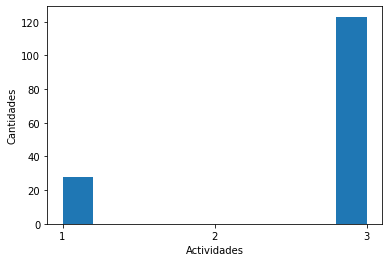

Gráfico de Barra Clúster Agglomerative 5


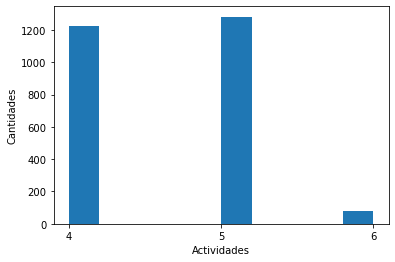

In [40]:

for x in ahc_values:
    data = y6[y6.y3 == x]
    print("Gráfico de Barra Clúster Agglomerative "+str(x))
    plt.xlabel('Actividades')
    plt.ylabel('Cantidades')
    plt.xticks(rangos)
    plt.hist(data.y1)
    plt.show()


Gráfico de Barra de Clúster Dbscan -1


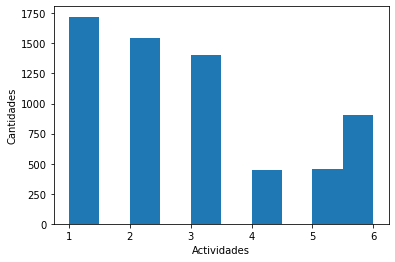

Gráfico de Barra de Clúster Dbscan 0


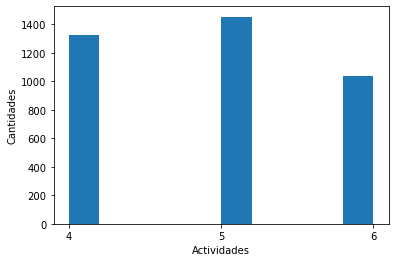

In [41]:
 for x in dbscan_values:
    data = y6[y6.y4 == x]
    print("Gráfico de Barra de Clúster Dbscan "+str(x))
    plt.xlabel('Actividades')
    plt.ylabel('Cantidades')
    plt.xticks(rangos)
    plt.hist(data.y1)
    plt.show()



**3. Mire la correspondencia entre las marcas de grupo y las etiquetas de clase originales y diga en qué tipo de actividades se confunde el algoritmo K-Means y Agglomerative. <span style="color:red">(2 pts)</span>**

In [ ]:
Las actividades dobde se confunden K-means y Agglomerative es en la 1 y 2 que corresponde a las que son caminatas versus con los que estan sentados.

**4. ¿Qué tipos de actividad se incluyen en cada clúster?. En otras palabras, diga cuales actividades estan incluidas en cada cluster. Luego de obtenerlas puede escribir su respuesta en "Respuesta: ...". <span style="color:red">(2 pts)</span>** 

**Por ejemplo:**

Cluster 1: sitting, laying y walking downstairs<p>
...<p>
Cluster 6: Todas las actividades



In [ ]:
# Cantidad de valores que tiene cada cluster de Kmeans
df['kmeans'].value_counts()

En el caso de K-means es lo siguiente:
Cluster 0: 1 WALKING, 2 WALKING_UPSTAIRS, 3 WALKING_DOWNSTAIRS y aparece escasamente 6 LAYING
Cluster 1: 4 SITTING  6 LAYING
Cluster 2: 4 SITTING5 5 STANDING  6 LAYING
Cluster 3: 1 WALKING, 2 WALKING_UPSTAIRS, 3 WALKING_DOWNSTAIRS
Cluster 4: 1 WALKING, 2 WALKING_UPSTAIRS, 3 WALKING_DOWNSTAIRS
Cluster 5: 4 SITTING5  5 STANDING  6 LAYING

In [ ]:
# CAntidad de valores que tiene cada cluster de Kmeans
df['ahc'].value_counts()

In [ ]:
En el caso de Agglomerativo  es lo siguiente:
Cluster 0: 1 WALKING, 2 WALKING_UPSTAIRS, 3 WALKING_DOWNSTAIRS 
Cluster 1: 4 SITTING5 5 STANDING  6 LAYING
Cluster 2: 1 WALKING, 2 WALKING_UPSTAIRS, 3 WALKING_DOWNSTAIRS
Cluster 3: 1 WALKING, 3 WALKING_DOWNSTAIRS
Cluster 4: 4 SITTING5  6 LAYING
Cluster 5: 4 SITTING5  5 STANDING  6 LAYING


In [ ]:
df['dbscan'].value_counts()

In [ ]:
En el caso de DBSCAN es lo siguiente:
Cluster -1: 1 WALKING, 2 WALKING_UPSTAIRS, 3 WALKING_DOWNSTAIRS 4 SITTING5  5 STANDING  6 LAYING
Cluster 0:  4 SITTING5 5 STANDING  6 LAYING

**Respuesta: ...**

Vemos que para cada clase (es decir, cada actividad) hay varios grupos. Veamos el porcentaje máximo de objetos en una clase que se asignan a un solo clúster. Esta será una métrica simple que caracteriza la facilidad con la que la clase se separa de otras cuando se agrupa.

Ejemplo: si para la clase "bajando las escaleras" (con 1406 instancias pertenecientes a ella), la distribución de clústeres es:

* cluster 1 - 900
* cluster 3 - 500
* cluster 6 - 6,

entonces dicha participación será 900/1406 aprox 0.64.

**5. ¿Qué actividad se separa del resto mejor que otras según la métrica simple descrita en la tarea? <span style="color:red">(2 pts)</span>**

## Pregunta 2. Aplicación de técnica de reducción de dimensionalidad

La idea es que aplique la técnica de reducción de dimensionalidad PCA sobre los datos entregados y luego realice el mismo procedimiento de la pregunta 1 con el fin de comparar los resultados agrupando los datos con y sin reducción de dimensionalidad.

**1. Aplique PCA sobre los datos. <span style="color:red">(2pts)</span>**

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA()
pca_x = pca.fit_transform(X_esc)
pca_x

array([[-1.63809798e+01,  1.99508307e+00,  3.41569023e+00, ...,
        -7.05435734e-16, -1.07057846e-17,  1.10960295e-16],
       [-1.55821733e+01,  1.18259368e+00, -3.21206753e-01, ...,
         2.45515943e-15,  3.13730574e-16,  6.55211665e-17],
       [-1.54239892e+01,  2.24316643e+00, -1.23778356e+00, ...,
         5.18523503e-16,  2.19144753e-16,  8.42225291e-17],
       ...,
       [ 1.18468531e+01, -3.43356502e+00,  2.18801926e+00, ...,
        -6.97358711e-16,  4.28860810e-16,  5.81535902e-17],
       [ 8.20668637e+00, -4.38648876e+00,  1.31871955e+00, ...,
        -7.96074120e-16,  1.10038173e-18,  8.57305587e-18],
       [ 9.31117251e+00, -3.98616133e+00,  1.93301747e+00, ...,
        -5.68192015e-16, -4.72370550e-17,  1.13188116e-17]])

Luego de aplicar PCA y antes de realizar los métodos de clustering, responda las siguientes preguntas.

**2. ¿Cuál es el número mínimo de componentes principales necesarios para cubrir el 90 % de la varianza de los datos originales? <span style="color:red">(2 pts)</span>**

In [44]:
pca_90 = PCA(n_components=.9)
pca_09 = pca_90.fit_transform(X_esc)

In [45]:
print ( "Total de Componentes = ", pca_90.n_components_, )

Total de Componentes =  65


**3. ¿Qué porcentaje de la varianza cubre el primer componente principal? Redondear al porcentaje más cercano. <span style="color:red">(2 pts)</span>**

In [46]:
print("{:2.1f}% es el porcentaje que explica el primer componente principal ".format(pca.explained_variance_ratio_[0]*100))

50.7% es el porcentaje que explica el primer componente principal 


**4. Visualice los datos en proyección sobre los dos primeros componentes principales. <span style="color:red">(2 pts)</span>**

In [47]:
pca2 = PCA(n_components=2)
pca2.fit(df)
pca2_ = pca2.transform(X_esc)

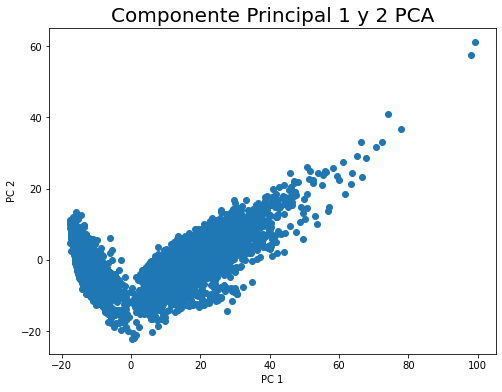

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(pca2_[:,0], pca2_[:,1])
plt.title('Componente Principal 1 y 2 PCA',  fontsize= 20)
plt.ylabel('PC 2')
plt.xlabel('PC 1')
plt.show()

**5. Vuelva a repetir lo realizado en la pregunta 1, pero ahora teniendo en cuenta las componentes principales que decidio dejar. <span style="color:red">(4 pts)</span>**

In [49]:
scores = []
scores_s = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 24)
    km.fit(pca_09)
    scores.append(km.inertia_)
    scores_s.append(silhouette_score(pca_09, km.labels_))

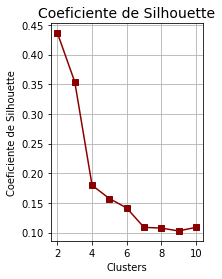

In [50]:
# Coeficiente de Silhouette Method
plt.subplot(1,2,2)
plt.plot(range(2, 11), scores_s, '-s', color='darkred')
plt.title('Coeficiente de Silhouette',  fontsize= 14)
plt.xlabel('Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.grid()

plt.show()

In [51]:
kmeans = KMeans(n_clusters=6, random_state=24)
labels_kmeans = kmeans.fit_predict(pca_09)

In [52]:
dbscan = DBSCAN(eps=12, min_samples = 100)
dbscan = dbscan.fit(pca_09)
y_dbscan = dbscan.labels_

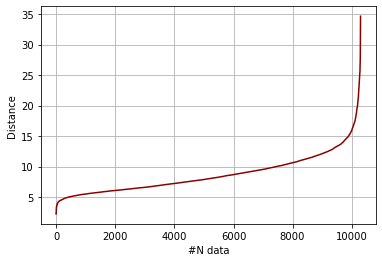

In [53]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(pca_09)
distances, indices = neighbors_fit.kneighbors(pca_09)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances, color='darkred')
plt.xlabel('#N data')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [54]:
ahc = AgglomerativeClustering(n_clusters=6)
ahc.fit(pca_09)
y_ahc = ahc.labels_

In [55]:
clusters_list = range(2, 15) # rango de clusters

silhouette_scores = []
for c in clusters_list:
    ahc = AgglomerativeClustering(n_clusters= c, affinity='euclidean', linkage='average')
    clusters = ahc.fit_predict(pca_09)
    
    sil_metric = silhouette_score(pca_09, clusters)
    silhouette_scores.append(sil_metric)

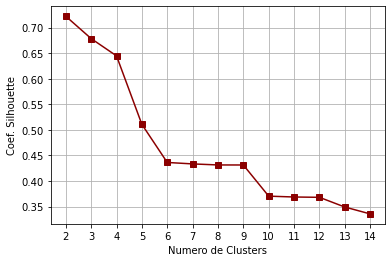

In [56]:
plt.plot(range(2, 15), silhouette_scores, '-s', color='darkred')
plt.xlabel('Numero de Clusters')
plt.ylabel('Coef. Silhouette')
plt.xticks(range(2, 15))
plt.grid()
plt.show()

In [57]:
best = np.argmax(silhouette_scores)
mejor_numero_de_clusters = clusters_list[best]
mejor_numero_de_clusters

2

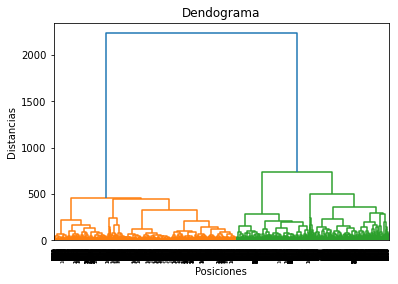

In [58]:
dend = shc.dendrogram(shc.linkage(pca_09, method='ward'))
 
plt.title('Dendograma')
plt.xlabel('Posiciones')
plt.ylabel('Distancias')
plt.show()

**6. Evalué la agrupación mediante métricas y diga cual método de clustering esta generando una mejor agrupación. <span style="color:red">(3 pts)</span>**

Si bien tant Kmeans como Aglomerative siguen considerando que 2 cluster es la mejor opcion, en el caso de Kmeans al aplicar disminuye el rendimiento de 2 cluster y mejora levemente el de 3 a 6 clúster. 

**7. Visualice los cluster formados sobre dos o tres (opcional) componentes principales. Asimismo, muestre los clusters usando las etiquetas reales. <span style="color:red">(3 pts)</span>**

Dos componentes

In [59]:
pca = PCA(n_components=2)
pca.fit(df)
pca_7 = pca.transform(df)

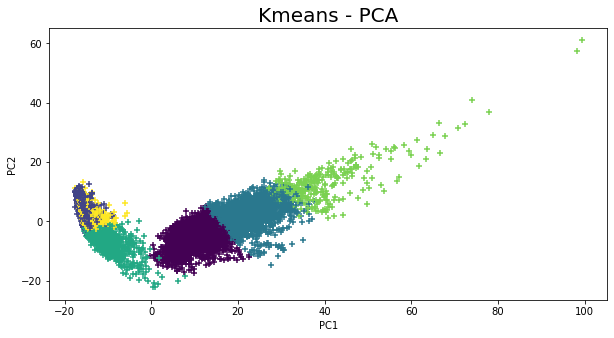

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(pca_7[:,0], pca_7[:,1], c=labels_kmeans, marker='+')
plt.title('Kmeans - PCA',  fontsize= 20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

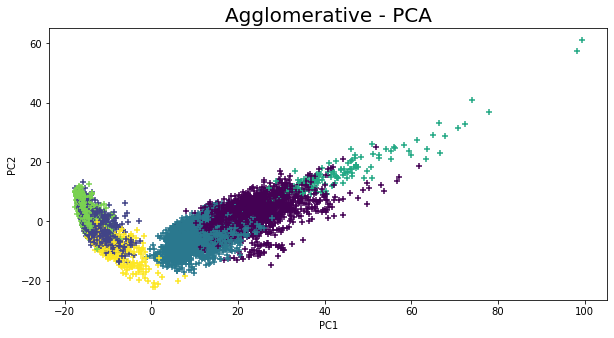

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(pca_7[:,0], pca_7[:,1], c=y_ahc , marker='+')
plt.title('Agglomerative - PCA',  fontsize= 20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

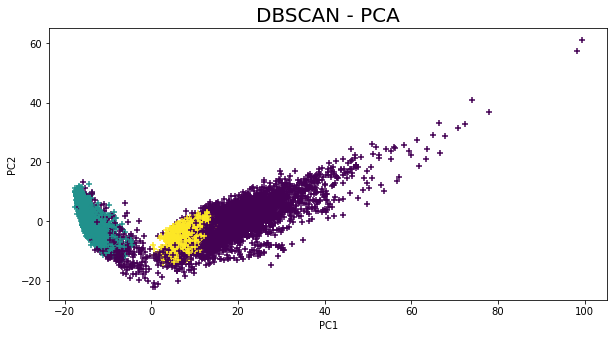

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(pca_7[:,0], pca_7[:,1], c=y_dbscan , marker='+')
plt.title('DBSCAN - PCA',  fontsize= 20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Tres componentes 

In [63]:
pca = PCA(n_components=3)
pca.fit(df)
pca_73 = pca.transform(df)

No handles with labels found to put in legend.


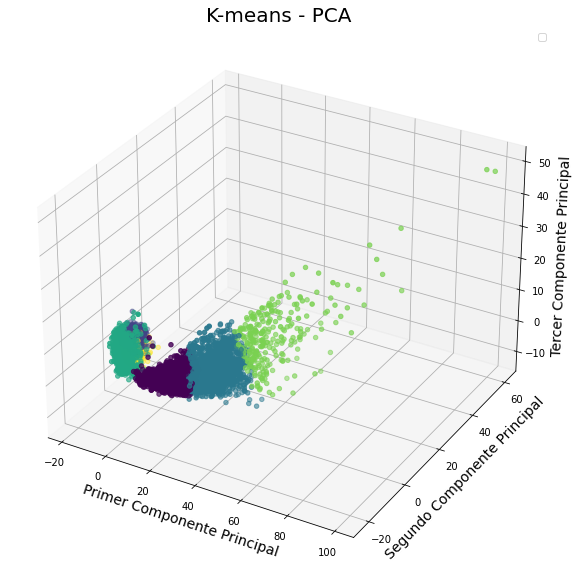

In [64]:
Xax = pca_73[:,0]
Yax = pca_73[:,1]
Zax = pca_73[:,2]


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
ax.scatter(Xax, Yax, Zax, c=labels_kmeans.astype(float))
    
plt.title('K-means - PCA',  fontsize= 20)
ax.set_xlabel("Primer Componente Principal", fontsize=14)
ax.set_ylabel("Segundo Componente Principal", fontsize=14)
ax.set_zlabel("Tercer Componente Principal", fontsize=14)

ax.legend()
plt.show()

No handles with labels found to put in legend.


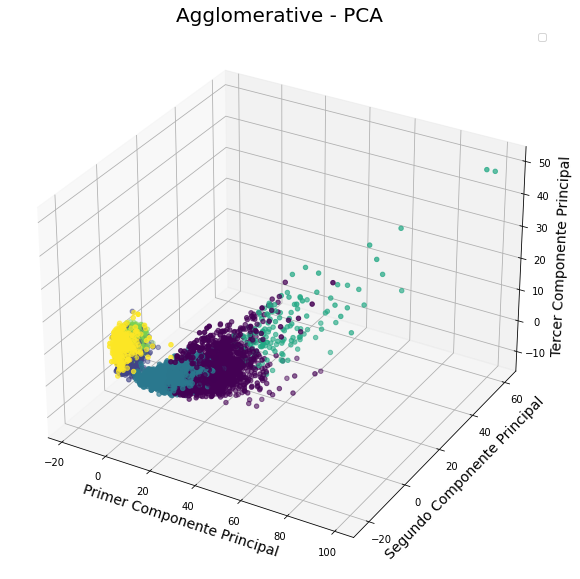

In [65]:
Xax = pca_73[:,0]
Yax = pca_73[:,1]
Zax = pca_73[:,2]


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
ax.scatter(Xax, Yax, Zax, c=y_ahc.astype(float))
    
plt.title('Agglomerative - PCA',  fontsize= 20)
ax.set_xlabel("Primer Componente Principal", fontsize=14)
ax.set_ylabel("Segundo Componente Principal", fontsize=14)
ax.set_zlabel("Tercer Componente Principal", fontsize=14)

ax.legend()
plt.show()

No handles with labels found to put in legend.


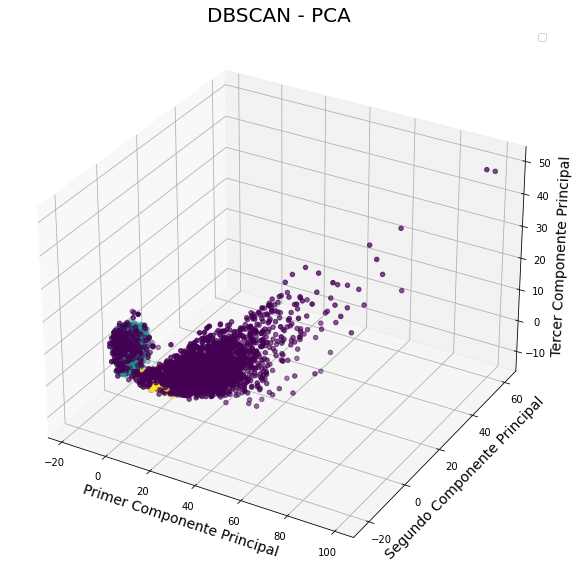

In [66]:
Xax = pca_73[:,0]
Yax = pca_73[:,1]
Zax = pca_73[:,2]


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
ax.scatter(Xax, Yax, Zax, c=y_dbscan.astype(float))
    
plt.title('DBSCAN - PCA',  fontsize= 20)
ax.set_xlabel("Primer Componente Principal", fontsize=14)
ax.set_ylabel("Segundo Componente Principal", fontsize=14)
ax.set_zlabel("Tercer Componente Principal", fontsize=14)

ax.legend()
plt.show()

8. Concluya las diferencias, o bien, resultados, de la utilización de PCA sobre la agrupación. ¿Porque cree usted que fue mejor o peor?

Como señalamos anteriormente, PCA mejoró levemente el rendimiento de Kmeans tanto los clúster entre 3 a 6. EN cuanto a visualización, los datos se reflejan de mejor manera en Kmeans como Agglomerative, siendo más claro en el caso de Kmeans. Esto no ocurre en ninguna de las situaciones para el caso de DBSCAN. 